In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from numpy import nan as NA
from pandas import DataFrame, Series

%matplotlib inline

In [3]:
# Series
# 数组与字典的结合，有序，但是可以使用非数字下标索引。

In [4]:
obj = Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [5]:
obj.values

array([ 4,  7, -5,  3], dtype=int64)

In [6]:
obj2 = Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
print(obj2)
print(obj2.index)

d    4
b    7
a   -5
c    3
dtype: int64
Index(['d', 'b', 'a', 'c'], dtype='object')


In [7]:
print(obj2[1])
print(obj2['b'])

7
7


In [8]:
obj2[obj2 > 0] # 

d    4
b    7
c    3
dtype: int64

In [9]:
'b' in obj2 # 判断key是否存在

True

In [11]:
print(np.exp(obj2))
print(obj2 * 2)

d      54.598150
b    1096.633158
a       0.006738
c      20.085537
dtype: float64
d     8
b    14
a   -10
c     6
dtype: int64


In [14]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = Series(sdata) # 使用字典初始化Series，但是顺序没有保证。
obj3

Ohio      35000
Oregon    16000
Texas     71000
Utah       5000
dtype: int64

In [16]:
states = ['California', 'Ohio', 'Oregon', 'Texas', 'Utah', 'New Jersy']
obj4 = Series(sdata, index=states) # 字典和索引数组结合保证顺序
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Utah           5000.0
New Jersy         NaN
dtype: float64

In [15]:
print(pd.isnull(obj4)) # 检测缺失值
print(obj4.isnull())

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool
California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool


In [16]:
obj3 + obj4 # 对应索引位置相加，对不上的设置为None

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

In [17]:
obj4.name = 'population' # 给Series起名
obj4.index.name = 'state' # 给Series的index起名
print(obj4)

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64


In [12]:
obj = Series([4, 7, -5, 3])
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

In [18]:
obj = Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e']) # 指定索引顺序
print(obj2)
obj.reindex(['a', 'b', 'c', 'd', 'e'], fill_value=obj.mean()) # 指定填充值

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64


a   -5.3
b    7.2
c    3.6
d    4.5
e    2.5
dtype: float64

In [48]:
obj3 = Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3.reindex(range(6), method='ffill') # 指定填充方式为ffill

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [19]:
obj = Series([4, 7, -3, 2])
obj.sort_values() # 根据值排序

2   -3
3    2
0    4
1    7
dtype: int64

In [27]:
index = ['d', 'c', 'a', 'b']
obj = Series([4, 7, -3, 2], index=index)
index = sorted(index)
obj = obj.reindex(index)
obj

a   -3
b    2
c    7
d    4
dtype: int64

In [30]:
index = ['d', 'c', 'a', 'b', 'f', 'g']
obj = Series([4, 7, -3, 2, 9, 3], index=index)
x = obj[1:5] # 左闭右开区间，并且x没有复制生成一个新的Series。
x[2] = 10
obj

d     4
c     7
a    -3
b    10
f     9
g     3
dtype: int64

In [35]:
print(obj['c':'f'])
print(obj['b':'d':-1]) # 闭区间，-1代表反方向

c     7
a    -3
b    10
f     9
dtype: int64
b    10
a    -3
c     7
d     4
dtype: int64


In [19]:
# DataFrame
# 本质上就是一个二维数组，用index定位行，用columns定位列。
#           col_1 col_2 ... col_n
#  index_1  x11   x12       x1n 
#  index_2  x21   x22       x2n
#  ...
#  index_m  xm1   xm2       xmn
#
#        房价  人口 GDP
#  上海  ...
#  北京
#  天津

In [36]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9]} # key代表列的名字，对应的数组就是这个列的值。
frame = DataFrame(data)
frame

,pop,state,year
0,1.5,Ohio,2000
1,1.7,Ohio,2001
2,3.6,Ohio,2002
3,2.4,Nevada,2001
4,2.9,Nevada,2002


In [21]:
DataFrame(data, columns=['year', 'state', 'pop']) # 可以指定列的顺序

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9


In [40]:
frame2 = DataFrame(data, 
                   columns=['year', 'state', 'pop', 'debt'], # 匹配不到的行和列设置为None
                   index=['one', 'two', 'three', 'four', 'five']) # 使用index指定列
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN


In [41]:
frame = DataFrame({'year': [2000, 2001, 2002, 2003, 2004],
                   'sales': [1500, 3700, 2400, 2900, 4900]})
frame
frame.set_index('year') # 列变成索引

,sales
year,
2000,1500
2001,3700
2002,2400
2003,2900
2004,4900


In [42]:
print(frame2.year) # 快速访问列，不管是一行还是一列，返回的是一个Series。
print(frame2['pop']) # 和普通二维数组非常不一样！！！

one      2000
two      2001
three    2002
four     2001
five     2002
Name: year, dtype: int64
one      1.5
two      1.7
three    3.6
four     2.4
five     2.9
Name: pop, dtype: float64


In [43]:
# iloc用数字索引访问行和列（左闭右开区间），ix方法已经被淘汰。
print(frame2.iloc[1,]) # 访问第1行
print(frame2.iloc[:,2]) # 访问第2列pop
print(frame2.iloc[1:3, 0:3]) #第1/2行，第0/1/2列切片

year     2001
state    Ohio
pop       1.7
debt      NaN
Name: two, dtype: object
one      1.5
two      1.7
three    3.6
four     2.4
five     2.9
Name: pop, dtype: float64
       year state  pop
two    2001  Ohio  1.7
three  2002  Ohio  3.6


In [44]:
# loc用名字索引访问行和列（闭区间）
print(frame2.loc['one',])
print(frame2.loc['one':'three',])
print(frame2.loc[:,'state'])
print(frame2.loc['two':'four','year':'debt'])

year     2000
state    Ohio
pop       1.5
debt      NaN
Name: one, dtype: object
       year state  pop debt
one    2000  Ohio  1.5  NaN
two    2001  Ohio  1.7  NaN
three  2002  Ohio  3.6  NaN
one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
Name: state, dtype: object
       year   state  pop debt
two    2001    Ohio  1.7  NaN
three  2002    Ohio  3.6  NaN
four   2001  Nevada  2.4  NaN


In [45]:
# 使用iloc或loc选择指定的行列组合
frame2.iloc[[0, 1, 3], [0, 2]]
frame2.loc[['one', 'three', 'four'], ['state', 'pop']]

,state,pop
one,Ohio,1.5
three,Ohio,3.6
four,Nevada,2.4


In [49]:
frame2['debt'] = 100 # 作用在所有元素上
print(frame2)
frame2['debt'] = np.arange(5) # 长度必须一致
print(frame2)
frame2['debt'] = Series([-1.2, -1.5, -1.7, 2], index=['two', 'four', 'five', 'six']) # 匹配不到的索引自动扔掉
print(frame2)

       year   state  pop  debt
one    2000    Ohio  1.5   100
two    2001    Ohio  1.7   100
three  2002    Ohio  3.6   100
four   2001  Nevada  2.4   100
five   2002  Nevada  2.9   100
       year   state  pop  debt
one    2000    Ohio  1.5     0
two    2001    Ohio  1.7     1
three  2002    Ohio  3.6     2
four   2001  Nevada  2.4     3
five   2002  Nevada  2.9     4
       year   state  pop  debt
one    2000    Ohio  1.5   NaN
two    2001    Ohio  1.7  -1.2
three  2002    Ohio  3.6   NaN
four   2001  Nevada  2.4  -1.5
five   2002  Nevada  2.9  -1.7


In [52]:
frame2['eastern'] = (frame2.state == 'Ohio')
frame2
frame2['big'] = (frame2['pop'] > 2.5)
frame2

,year,state,pop,debt,eastern,big
one,2000,Ohio,1.5,NaN,True,False
two,2001,Ohio,1.7,-1.2,True,False
three,2002,Ohio,3.6,NaN,True,True
four,2001,Nevada,2.4,-1.5,False,False
five,2002,Nevada,2.9,-1.7,False,True


In [53]:
frame = DataFrame(np.arange(9).reshape((3, 3)),
                  index=['a', 'c', 'd'],
                  columns=['Ohio', 'Texas', 'California'])
print(frame)
frame2 = frame.reindex(['a', 'b', 'c', 'd']) # 数量不用匹配，没有的自动填充NaN。
states = ['Texas', 'Utah', 'California']
frame3 = frame2.reindex(columns=states) # 重新指定行/列索引顺序
frame3

   Ohio  Texas  California
a     0      1           2
c     3      4           5
d     6      7           8


,Texas,Utah,California
a,1.0,NaN,2.0
b,NaN,NaN,NaN
c,4.0,NaN,5.0
d,7.0,NaN,8.0


In [56]:
data = DataFrame(np.arange(16).reshape((4, 4)),
                 index=['Ohio', 'Colorado', 'Utah', 'New York'],
                 columns=['one', 'two', 'three', 'four'])
print(data)
print(data.drop(['Colorado', 'Ohio']))
print(data.drop('two', axis=1))
print(data.drop(['two', 'four'], axis=1))

          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15
          one  two  three  four
Utah        8    9     10    11
New York   12   13     14    15
          one  three  four
Ohio        0      2     3
Colorado    4      6     7
Utah        8     10    11
New York   12     14    15
          one  three
Ohio        0      2
Colorado    4      6
Utah        8     10
New York   12     14


In [57]:
# 数据过滤
# data[data.three < 10] # three列上值大于等于10的行扔掉，小于的保留。
data.loc[data.three < 5, ]

,one,two,three,four
Ohio,0,1,2,3


In [58]:
data[data > 10] = 0
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,0
New York,0,0,0,0


In [60]:
data + 100

,one,two,three,four
Ohio,100,101,102,103
Colorado,104,105,106,107
Utah,108,109,110,100
New York,100,100,100,100


In [62]:
# DataFrame和Series的计算
frame = DataFrame(np.arange(12.).reshape((4, 3)),
                  columns=list('bde'),
                  index=['Utah', 'Ohio', 'Texas', 'Oregon'])
s = frame.iloc[0]
print(frame)
print(s)
print(frame - s) # 每一行减去对应的s，本质上每一行在对应的索引位置上相减。

          b     d     e
Utah    0.0   1.0   2.0
Ohio    3.0   4.0   5.0
Texas   6.0   7.0   8.0
Oregon  9.0  10.0  11.0
b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64
          b    d    e
Utah    0.0  0.0  0.0
Ohio    3.0  3.0  3.0
Texas   6.0  6.0  6.0
Oregon  9.0  9.0  9.0


In [63]:
s2 = Series(range(3), index=['b', 'e', 'f'])
print(s2)
print(frame + s2)

b    0
e    1
f    2
dtype: int32
          b   d     e   f
Utah    0.0 NaN   3.0 NaN
Ohio    3.0 NaN   6.0 NaN
Texas   6.0 NaN   9.0 NaN
Oregon  9.0 NaN  12.0 NaN


In [65]:
# 行上操作的特殊性
s3 = frame['d']
print(s3)
frame.sub(s3, axis=0) # 每一列都沿着行的方向，根据index做减法。

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64


,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


In [67]:
frame = DataFrame(np.random.randn(4, 3),
                  columns=list('bde'),
                  index=['Utah', 'Ohio', 'Texas', 'Oregon'])
print(frame)
np.abs(frame) # 元素级函数

               b         d         e
Utah   -0.440954 -0.231354  0.610142
Ohio   -1.527289 -1.057460  0.930104
Texas  -0.186011  2.622813  1.747329
Oregon  1.819156  0.388383  1.037672


,b,d,e
Utah,0.440954,0.231354,0.610142
Ohio,1.527289,1.057460,0.930104
Texas,0.186011,2.622813,1.747329
Oregon,1.819156,0.388383,1.037672


In [97]:
f = lambda x: x.max() - x.min()

In [98]:
frame.apply(f) # 每一列应用f

b    1.619640
d    0.592445
e    2.368363
dtype: float64

In [99]:
frame.apply(f, axis=1)

Utah      1.750079
Ohio      1.306898
Texas     0.964347
Oregon    1.660683
dtype: float64

In [69]:
def f(x):
    return Series([x.min(), x.max()], index=['min', 'max'])
frame.apply(f, axis=1)

,min,max
Utah,-0.440954,0.610142
Ohio,-1.527289,0.930104
Texas,-0.186011,2.622813
Oregon,0.388383,1.819156


In [101]:
format = lambda x: '%.2f' % x

In [102]:
frame.applymap(format)

,b,d,e
Utah,-1.31,0.44,-0.83
Ohio,0.31,-0.15,1.15
Texas,0.28,0.35,-0.61
Oregon,-0.12,0.39,1.54


In [103]:
frame['e'].map(format)

Utah      -0.83
Ohio       1.15
Texas     -0.61
Oregon     1.54
Name: e, dtype: object

In [104]:
# 排序
frame = DataFrame(np.arange(8).reshape((2, 4)),
                  index=['three', 'one'],
                  columns=['d', 'a', 'b', 'c'])
frame.sort_index() # 按行索引排序

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [105]:
frame.sort_index(axis=1, ascending=False) # 按列名降序排序

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [72]:
frame = DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame

,a,b
0,0,4
1,1,7
2,0,-3
3,1,2


In [73]:
frame.sort_values(by='b', ascending=False) # 按b列的值排序

,a,b
1,1,7
0,0,4
3,1,2
2,0,-3


In [74]:
frame.sort_values(by=['a', 'b']) # 参考sql的order by

,a,b
2,0,-3
0,0,4
3,1,2
1,1,7


In [112]:
frame.sort_values(by=[2], axis=1) # 做了什么？

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [113]:
# 自学rank函数（与出现位置有关的排序）

In [114]:
df = DataFrame([[1.4, np.nan], [7.1, -4.5], [np.nan, np.nan], [0.75, -1.3]],
               index=['a', 'b', 'c', 'd'],
               columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [115]:
print(df.sum()) # 沿着行的方向对每一列求sum
print(df.sum(axis=1))

one    9.25
two   -5.80
dtype: float64
a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64


In [116]:
df.cumsum() # 累加

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [117]:
df.describe() # 每一列的统计信息（自己尝试一下非数值型变量统计结果是什么？）

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [ ]:
# TODO：相关系数和协方差，使用tushare

In [124]:
data = DataFrame([[1., 6.5, 3.],
                  [1., 7, NA],
                  [NA, NA, NA],
                  [NA, 6.5, 3.]])
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,7.0,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [125]:
cleaned = data.dropna() # 有NA的行呗删除
cleaned

,0,1,2
0,1.0,6.5,3.0


In [126]:
data.dropna(how='all') # 只有某一行全部是NA才删除

,0,1,2
0,1.0,6.5,3.0
1,1.0,7.0,NaN
3,NaN,6.5,3.0


In [129]:
data.dropna(thresh=3, axis=1) # 至少有3个值不为NA的列被保留，其它删除

,1
0,6.5
1,7.0
2,NaN
3,6.5


In [130]:
# 数据合并，首先复习一下SQL关于join的概念。
# outer: 左右，左-，-右
# inner：左右
# left： 左右，左-
# right： 左右，-右

In [131]:
df1 = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                 'data1': range(7)})
df2 = DataFrame({'key': ['a', 'b', 'd'],
                 'data2': range(3)})
print(df1)
print(df2)

   data1 key
0      0   b
1      1   b
2      2   a
3      3   c
4      4   a
5      5   a
6      6   b
   data2 key
0      0   a
1      1   b
2      2   d


In [132]:
pd.merge(df1, df2) # 默认根据名字相同的列作合并，等价pd.merge(df1, df2, on='key')

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [133]:
df3 = DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                 'data1': range(7)})
df4 = DataFrame({'rkey': ['a', 'b', 'd'],
                 'data2': range(3)})
pd.merge(df3, df4, left_on='lkey', right_on='rkey') # 分别指定用于合并的参考列

,data1,lkey,data2,rkey
0,0,b,1,b
1,1,b,1,b
2,6,b,1,b
3,2,a,0,a
4,4,a,0,a
5,5,a,0,a


In [134]:
pd.merge(df1, df2, how='outer') # 指定连接方式

,data1,key,data2
0,0.0,b,1.0
1,1.0,b,1.0
2,6.0,b,1.0
3,2.0,a,0.0
4,4.0,a,0.0
5,5.0,a,0.0
6,3.0,c,NaN
7,NaN,d,2.0


In [135]:
left = DataFrame({'key1': ['foo', 'foo', 'bar'],
                  'key2': ['one', 'two', 'one'],
                  'lval': [1, 2, 3]})

right = DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                   'key2': ['one', 'one', 'one', 'two'],
                   'rval': [4, 5, 6, 7]})
pd.merge(left, right, on=['key1', 'key2'], how='outer') # 基于多个列的合并

,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


In [136]:
pd.merge(left, right, on='key1', suffixes=('_left', '_right')) # 重名列可以指定合并后的后缀

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [137]:
left1 = DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                   'value': range(6)})
right1 = DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])
print(left1)
print(right1)

  key  value
0   a      0
1   b      1
2   a      2
3   a      3
4   b      4
5   c      5
   group_val
a        3.5
b        7.0


In [138]:
pd.merge(left1, right1, left_on='key', right_index=True) # 使用right的索引参与合并

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [139]:
left2 = DataFrame([[1., 2.], [3., 4.], [5., 6.]],
                  index=['a', 'c', 'e'],
                  columns=['Ohio', 'Nevada'])
right2 = DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                   index=['b', 'c', 'd', 'e'],
                   columns=['Missouri', 'Alabama'])

In [140]:
left2.join(right2, how='outer') # join默认使用索引合并

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [141]:
another = DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                    index=['a', 'c', 'e', 'f'],
                    columns=['New York', 'Oregon'])
left2.join([right2, another]) # 一次合并多个DataFrame，默认使用全连接。

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0


In [142]:
s1 = Series([0, 1], index=['a', 'b'])
s2 = Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = Series([5, 6], index=['f', 'g'])
pd.concat([s1, s2, s3]) # 默认沿着行的方向连接

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [144]:
pd.concat([s1, s2, s3], axis=1) # 在列方向上连接

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [145]:
a = Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],
          index=['f', 'e', 'd', 'c', 'b', 'a'])
b = Series(np.arange(len(a), dtype=np.float64),
           index=['f', 'e', 'd', 'c', 'b', 'a'])
b[-1] = np.nan
np.where(pd.isnull(a), b, a) # 根据where筛选，如果a对应位置的元素为None就选b

array([ 0. ,  2.5,  2. ,  3.5,  4.5,  nan])

In [147]:
df1 = DataFrame({'a': [1., np.nan, 5., np.nan],
                'b': [np.nan, 2., np.nan, 6.],
                'c': range(2, 18, 4)})
df2 = DataFrame({'a': [5., 4., np.nan, 3., 7.],
                 'b': [np.nan, 3., 4., 6., 8.]})
print(df1)
print(df2)
df1.combine_first(df2)

     a    b   c
0  1.0  NaN   2
1  NaN  2.0   6
2  5.0  NaN  10
3  NaN  6.0  14
     a    b
0  5.0  NaN
1  4.0  3.0
2  NaN  4.0
3  3.0  6.0
4  7.0  8.0


,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


In [ ]:
# 其他需要的知识点
# 1. pivot和melt
# 2. 值替换
# 3. 数据切割
# 4. 排列组合和随机采样

In [149]:
# Pandas绘图

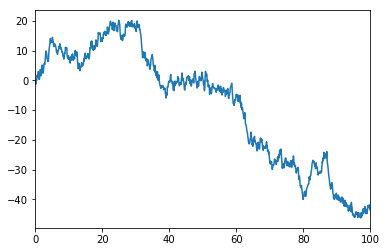

In [153]:
# 线型图
s = Series(np.random.randn(1000).cumsum(), index=np.arange(0, 100, 0.1))
s.plot()

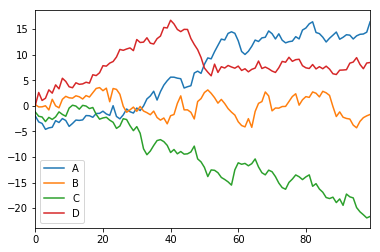

In [154]:
df = DataFrame(np.random.randn(100, 4).cumsum(0),
               columns=['A', 'B','C', 'D'],
               index=np.arange(0, 100, 1))
df.plot() # 每一列对应一条曲线

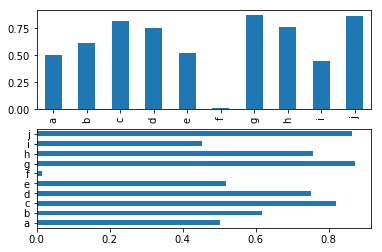

In [155]:
# 柱状图 - Series
data = Series(np.random.rand(10), index=list('abcdefghij'))
fig, axes = plt.subplots(2, 1)
data.plot(kind='bar', ax=axes[0])
data.plot(kind='barh', ax=axes[1])

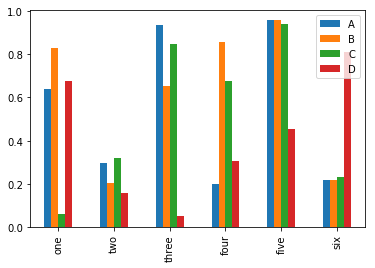

In [156]:
# 柱状图（并列） - Pandas
df = DataFrame(np.random.rand(6, 4),
               columns=['A', 'B', 'C', 'D'],
               index=['one', 'two','three', 'four', 'five', 'six'])
df.plot(kind='bar')

In [ ]:
# 单车案例分析

In [89]:
# 6个月数据
bike_df = pd.read_csv('data\\citibike\\JC-201704-citibike-tripdata.csv')
bike_df = bike_df.append(pd.read_csv('data\\citibike\\JC-201705-citibike-tripdata.csv'), ignore_index=False)
bike_df = bike_df.append(pd.read_csv('data\\citibike\\JC-201706-citibike-tripdata.csv'), ignore_index=False)
bike_df = bike_df.append(pd.read_csv('data\\citibike\\JC-201707-citibike-tripdata.csv'), ignore_index=False)
bike_df = bike_df.append(pd.read_csv('data\\citibike\\JC-201708-citibike-tripdata.csv'), ignore_index=False)
bike_df = bike_df.append(pd.read_csv('data\\citibike\\JC-201709-citibike-tripdata.csv'), ignore_index=False)
print(bike_df.shape)
bike_df.head()

(181376, 15)


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,252,2017-04-01 00:14:36,2017-04-01 00:18:48,3186,Grove St PATH,40.719586,-74.043117,3203,Hamilton Park,40.727596,-74.044247,26238,Subscriber,NaN,0
1,452,2017-04-01 00:15:47,2017-04-01 00:23:20,3203,Hamilton Park,40.727596,-74.044247,3213,Van Vorst Park,40.718489,-74.047727,26186,Subscriber,1962.0,1
2,465,2017-04-01 00:46:27,2017-04-01 00:54:13,3271,Danforth Light Rail,40.692640,-74.088012,3216,Columbia Park,40.697030,-74.096937,24659,Subscriber,1996.0,1
3,417,2017-04-01 00:47:15,2017-04-01 00:54:13,3271,Danforth Light Rail,40.692640,-74.088012,3216,Columbia Park,40.697030,-74.096937,24471,Subscriber,1994.0,1
4,391,2017-04-01 01:13:12,2017-04-01 01:19:44,3183,Exchange Place,40.716247,-74.033459,3202,Newport PATH,40.727224,-74.033759,24624,Subscriber,1983.0,1


In [90]:
# 数据统计
print('租赁点：%d' % len(bike_df['start station name'].unique()))
print('被骑自行车数量：%d' % len(bike_df['bikeid'].unique()))
print('骑行次数：%d' % bike_df.shape[0])
print('每次骑行时长（分钟）：%.2f' % float(bike_df['tripduration'].sum() / bike_df['bikeid'].count() / 60))
print('租借频率：%.2f' % float(bike_df['bikeid'].count() / len(bike_df['bikeid'].unique())))

租赁点：52
被骑自行车数量：883
骑行次数：181376
每次骑行时长（分钟）：14.09
租借频率：205.41


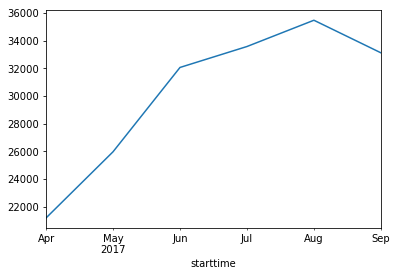

In [91]:
# 按月统计
bike_df['starttime']=pd.to_datetime(bike_df['starttime'])
bike_df = bike_df.set_index('starttime') # 转成时间序列
bike_df_by_month = bike_df.resample('M').apply(len)
bike_df_by_month = bike_df_by_month['bikeid']
bike_df_by_month
bike_df_by_month.plot()

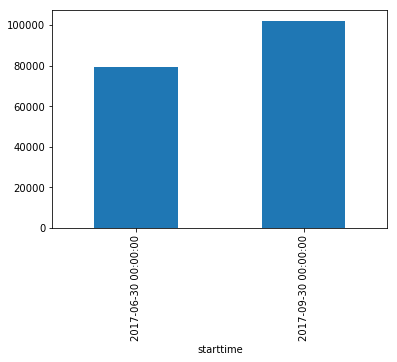

In [92]:
# 按季度统计
bike_df_by_quarter = bike_df.resample('Q').apply(len)
bike_df_by_quarter = bike_df_by_quarter['bikeid']
bike_df_by_quarter.plot(kind='bar')

In [93]:
# 性别分布
bike_df_by_gender= bike_df.groupby('gender')['bikeid'].agg(len) / bike_df["bikeid"].count() * 100
bike_df_by_gender

gender
0     8.371008
1    70.674180
2    20.954812
Name: bikeid, dtype: float64

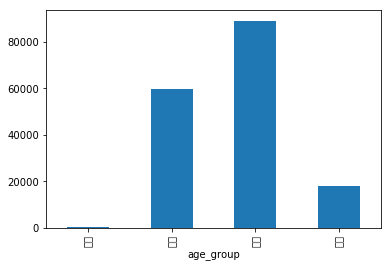

In [94]:
# 年龄分布
bike_df['age'] = 2016 - bike_df['birth year'] # 大于100岁虽然不合理，但先不管了，暂时保留。(15, 129)
bins = [0, 18, 30, 50, 200] # 不同年龄段对应的区间
age_group = ['少年', '青年', '中年', '老年']
bike_df['age_group'] = pd.cut(bike_df['age'], bins, labels=age_group)
bike_df_by_ag = bike_df.groupby('age_group')['age_group'].agg(len)
bike_df_by_ag.plot(kind='bar')

In [157]:
# Titanic案例分析

In [75]:
data_train = pd.read_csv('data/titanic_train.csv')
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [76]:
s_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
s_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
print(s_0)
print(s_1)

3    372
2     97
1     80
Name: Pclass, dtype: int64
1    136
3    119
2     87
Name: Pclass, dtype: int64


In [77]:
s_0 = data_train.Sex[data_train.Survived == 0].value_counts()
s_1 = data_train.Sex[data_train.Survived == 1].value_counts()
print(s_0)
print(s_1)

male      468
female     81
Name: Sex, dtype: int64
female    233
male      109
Name: Sex, dtype: int64


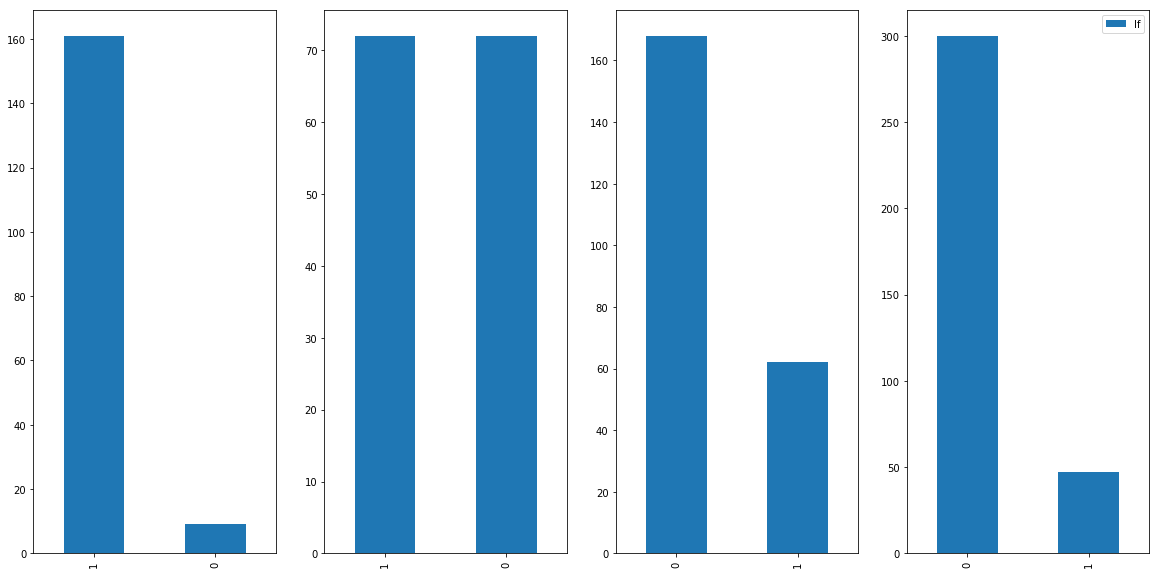

In [80]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(141)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass != 3].value_counts().plot(kind='bar', label='hf')
ax2 = fig.add_subplot(142)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='lf')
ax3 = fig.add_subplot(143)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass != 3].value_counts().plot(kind='bar', label='hm')
ax4 = fig.add_subplot(144)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='lf')
plt.legend()

In [83]:
from sklearn.ensemble import RandomForestRegressor

age_df = data_train[['Age', 'Fare', 'Parch', 'SibSp', 'Pclass']]
known_age = age_df[age_df.Age.notnull()].as_matrix()
unknown_age = age_df[age_df.Age.isnull()].as_matrix()
y = known_age[:, 0]
x = known_age[:, 1:] # 特征
rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
rfr.fit(x, y) # 训练
predicted_ages = rfr.predict(unknown_age[:, 1:])
data_train.loc[(data_train.Age.isnull()), 'Age'] = predicted_ages
data_train.Age

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
5      23.828953
6      54.000000
7       2.000000
8      27.000000
9      14.000000
10      4.000000
11     58.000000
12     20.000000
13     39.000000
14     14.000000
15     55.000000
16      2.000000
17     32.066493
18     31.000000
19     29.518205
20     35.000000
21     34.000000
22     15.000000
23     28.000000
24      8.000000
25     38.000000
26     29.518205
27     19.000000
28     22.380113
29     27.947206
         ...    
861    21.000000
862    48.000000
863    10.869867
864    24.000000
865    42.000000
866    27.000000
867    31.000000
868    25.977889
869     4.000000
870    26.000000
871    47.000000
872    33.000000
873    47.000000
874    28.000000
875    15.000000
876    20.000000
877    19.000000
878    27.947206
879    56.000000
880    25.000000
881    33.000000
882    22.000000
883    28.000000
884    25.000000
885    39.000000
886    27.000000
887    19.000000
888    16.1279

In [86]:
dummies_sex = pd.get_dummies(data_train['Sex'], prefix='sex')
dummies_sex.head()

,sex_female,sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [88]:
new_data_train = pd.concat([data_train, dummies_sex], axis=1)
new_data_train.drop(['Sex'], axis=1, inplace=True)
new_data_train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_female,sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1


In [ ]:
# 作业：根据美国大选投票数据汇总统计各州投票情况（数据：data/2016-us-ge-by-county.csv）
# 要求获得数据：每个州的投票人数，希拉里和川普各自的投票数